In [42]:
%pip install matplotlib pandas numpy seaborn wordcloud Pillow

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from PIL import Image


# Your code for loading images and plotting goes here

#### SỬ DỤNG ĐƯỜNG DẪN TƯƠNG ĐỐI

In [44]:
df = pd.read_csv('../Data/Masterchef.csv')

In [45]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        300 non-null    int64  
 1   text                           297 non-null    object 
 2   post_text                      288 non-null    object 
 3   shared_text                    16 non-null     object 
 4   original_text                  56 non-null     object 
 5   time                           300 non-null    object 
 6   timestamp                      300 non-null    int64  
 7   image                          151 non-null    object 
 8   image_lowquality               299 non-null    object 
 9   images                         298 non-null    object 
 10  images_description             298 non-null    object 
 11  images_lowquality              300 non-null    object 
 12  images_lowquality_description  300 non-null    obj

In [46]:
df.columns

Index(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time',
       'timestamp', 'image', 'image_lowquality', 'images',
       'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'fetched_time'],
      dtype='object')

In [47]:
num_rows = df.shape[0]
num_rows 

300

### LOẠI BỎ NHỮNG BÀI REACTIONS CÓ GIÁ TRỊ NONE

In [48]:
df.head(5)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,728166702677900,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,NaN,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,2023-11-24 00:00:00,1700758800,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7281...,"{'thích': 369, 'yêu thích': 68, 'thương thương...",440,NaN,126204090726016,NaN,7.281667e+14,['728166672677903'],False,2023-11-26 09:13:35.208990
1,727642092730361,The Thanksgiving dishes are cooking now... 🦃\n...,The Thanksgiving dishes are cooking now... 🦃\n...,NaN,The Thanksgiving dishes are cooking now... 🦃\n...,2023-11-23 01:16:11,1700676971,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7276...,"{'thích': 164, 'yêu thích': 28, 'thương thương...",193,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:13:51.364382
2,727607916067112,Who knew mashed potatoes were so complicated?!...,Who knew mashed potatoes were so complicated?!...,NaN,Who knew mashed potatoes were so complicated?!...,2023-11-23 00:02:37,1700672557,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7276...,"{'thích': 58, 'yêu thích': 3, 'thương thương': 1}",62,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:13:57.246897
3,723706983123872,Amazing skills indeed! 🐟👏\n\n📺: MasterChef on ...,Amazing skills indeed! 🐟👏\n\n📺: MasterChef on ...,NaN,NaN,2023-11-16 01:06:57,1700071617,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7237...,"{'thích': 502, 'yêu thích': 62, 'haha': 1, 'wo...",581,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:14:00.087903
4,722593639901873,Feel like your knife skills can't cut it? 🔪\n\...,Feel like your knife skills can't cut it? 🔪\n\...,NaN,NaN,2023-11-14 00:00:02,1699894802,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7225...,"{'thích': 109, 'yêu thích': 7}",116,NaN,126204090726016,NaN,7.225936e+14,['722593623235208'],False,2023-11-26 09:14:22.171084


In [49]:
# Lọc ra các bài viết có giá trị khác None trong cột 'reactions'
df = df[df['reactions'].notna()]

# Sắp xếp lại thứ tự của DataFrame
df.reset_index(drop=True, inplace=True)

### XOÁ BỎ NHỮNG BÀI GIÁ TRỊ NONE Ở PHẦN REACTIONS SẼ LÀM THAY ĐỔI SHAPE CỦA DF VÀ SAU ĐÓ CÀI LẠI ID CHO BÀI ĐĂNG

In [50]:
df.shape[0]

177

In [51]:
df.info

<bound method DataFrame.info of               post_id                                               text  \
0     728166702677900  Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...   
1     727642092730361  The Thanksgiving dishes are cooking now... 🦃\n...   
2     727607916067112  Who knew mashed potatoes were so complicated?!...   
3     723706983123872  Amazing skills indeed! 🐟👏\n\n📺: MasterChef on ...   
4     722593639901873  Feel like your knife skills can't cut it? 🔪\n\...   
..                ...                                                ...   
172  5655101081169595  What's going on in the MasterChef kitchen toni...   
173  5652856994727337  A knight in shining armor coming to the (bakin...   
174  5652345568111813  Are you ready for an all-new MasterChef? We ar...   
175  5650204744992562  We are going to miss Shayne in the Masterchef ...   
176  5645123868833983  It feels like a good day to catch up on the la...   

                                             post_text 

### CHUYỂN ĐỔI DF['REACTIONS'] TỪ DẠNG CHUỖI SANG DẠNG TỪ ĐIỂN

In [52]:
df['reactions']

0      {'thích': 369, 'yêu thích': 68, 'thương thương...
1      {'thích': 164, 'yêu thích': 28, 'thương thương...
2      {'thích': 58, 'yêu thích': 3, 'thương thương': 1}
3      {'thích': 502, 'yêu thích': 62, 'haha': 1, 'wo...
4                         {'thích': 109, 'yêu thích': 7}
                             ...                        
172    {'thích': 466, 'yêu thích': 80, 'wow': 4, 'thư...
173    {'thích': 2533, 'yêu thích': 391, 'haha': 83, ...
174    {'thích': 1090, 'yêu thích': 206, 'haha': 1, '...
175    {'thích': 15205, 'yêu thích': 4547, 'haha': 14...
176    {'thích': 922, 'yêu thích': 107, 'haha': 2, 't...
Name: reactions, Length: 177, dtype: object

In [53]:
df['reactions'] = df['reactions'].apply(ast.literal_eval)

In [54]:
df['reactions']

0      {'thích': 369, 'yêu thích': 68, 'thương thương...
1      {'thích': 164, 'yêu thích': 28, 'thương thương...
2      {'thích': 58, 'yêu thích': 3, 'thương thương': 1}
3      {'thích': 502, 'yêu thích': 62, 'haha': 1, 'wo...
4                         {'thích': 109, 'yêu thích': 7}
                             ...                        
172    {'thích': 466, 'yêu thích': 80, 'wow': 4, 'thư...
173    {'thích': 2533, 'yêu thích': 391, 'haha': 83, ...
174    {'thích': 1090, 'yêu thích': 206, 'haha': 1, '...
175    {'thích': 15205, 'yêu thích': 4547, 'haha': 14...
176    {'thích': 922, 'yêu thích': 107, 'haha': 2, 't...
Name: reactions, Length: 177, dtype: object

### TỔNG SỐ LƯỢNG REACTIONS


In [55]:
df['reaction_count']

0        440
1        193
2         62
3        581
4        116
       ...  
172      554
173     3033
174     1301
175    19958
176     1037
Name: reaction_count, Length: 177, dtype: int64

In [56]:
sum = 0
for i in range (df.shape[0]):
    sum += df['reaction_count'][i]

print(f"Total reactions: {sum}")

Total reactions: 575252


### TẠO 1 LIST CHỨA DF(REACTIONS)

In [57]:
reaction_data_list = []

In [58]:
for row in df['reactions']:
    print(row) 
    reaction_data_list.append(row)


{'thích': 369, 'yêu thích': 68, 'thương thương': 3}
{'thích': 164, 'yêu thích': 28, 'thương thương': 1}
{'thích': 58, 'yêu thích': 3, 'thương thương': 1}
{'thích': 502, 'yêu thích': 62, 'haha': 1, 'wow': 13, 'thương thương': 3}
{'thích': 109, 'yêu thích': 7}
{'thích': 51, 'yêu thích': 7, 'thương thương': 1}
{'thích': 243, 'yêu thích': 60, 'thương thương': 7}
{'thích': 143, 'yêu thích': 22}
{'thích': 140, 'yêu thích': 29, 'haha': 1}
{'thích': 645, 'yêu thích': 568, 'wow': 5, 'thương thương': 27, 'buồn': 9}
{'thích': 446, 'yêu thích': 60, 'haha': 3, 'thương thương': 3, 'buồn': 2, 'phẫn nộ': 2}
{'thích': 160, 'yêu thích': 29, 'haha': 1, 'thương thương': 1}
{'thích': 2971, 'yêu thích': 653, 'haha': 1, 'wow': 1, 'thương thương': 11, 'buồn': 1}
{'thích': 917, 'yêu thích': 405, 'wow': 5, 'thương thương': 9, 'buồn': 1, 'phẫn nộ': 3}
{'thích': 15047, 'yêu thích': 4653, 'haha': 4, 'wow': 46, 'thương thương': 93, 'buồn': 4, 'phẫn nộ': 20}
{'thích': 1545, 'yêu thích': 251, 'haha': 2, 'wow': 3, 'th

In [59]:
reaction_data_list

[{'thích': 369, 'yêu thích': 68, 'thương thương': 3},
 {'thích': 164, 'yêu thích': 28, 'thương thương': 1},
 {'thích': 58, 'yêu thích': 3, 'thương thương': 1},
 {'thích': 502, 'yêu thích': 62, 'haha': 1, 'wow': 13, 'thương thương': 3},
 {'thích': 109, 'yêu thích': 7},
 {'thích': 51, 'yêu thích': 7, 'thương thương': 1},
 {'thích': 243, 'yêu thích': 60, 'thương thương': 7},
 {'thích': 143, 'yêu thích': 22},
 {'thích': 140, 'yêu thích': 29, 'haha': 1},
 {'thích': 645, 'yêu thích': 568, 'wow': 5, 'thương thương': 27, 'buồn': 9},
 {'thích': 446,
  'yêu thích': 60,
  'haha': 3,
  'thương thương': 3,
  'buồn': 2,
  'phẫn nộ': 2},
 {'thích': 160, 'yêu thích': 29, 'haha': 1, 'thương thương': 1},
 {'thích': 2971,
  'yêu thích': 653,
  'haha': 1,
  'wow': 1,
  'thương thương': 11,
  'buồn': 1},
 {'thích': 917,
  'yêu thích': 405,
  'wow': 5,
  'thương thương': 9,
  'buồn': 1,
  'phẫn nộ': 3},
 {'thích': 15047,
  'yêu thích': 4653,
  'haha': 4,
  'wow': 46,
  'thương thương': 93,
  'buồn': 4,
  'p

### SỐ LƯỢNG THÍCH CỦA TỪNG BÀI

In [60]:
total_like_sum = 0
index = 1
for row_string in reaction_data_list:
    if 'thích' in row_string:
        thich_count = row_string['thích'] 

        print(f"Số lượng thích bài {index}: {thich_count}")
        total_like_sum += thich_count
    else:
        print("No 'thích' reaction in this row")
    index+=1
print(f"TỔNG SỐ LƯỢNG THÍCH LÀ {total_like_sum}")



Số lượng thích bài 1: 369
Số lượng thích bài 2: 164
Số lượng thích bài 3: 58
Số lượng thích bài 4: 502
Số lượng thích bài 5: 109
Số lượng thích bài 6: 51
Số lượng thích bài 7: 243
Số lượng thích bài 8: 143
Số lượng thích bài 9: 140
Số lượng thích bài 10: 645
Số lượng thích bài 11: 446
Số lượng thích bài 12: 160
Số lượng thích bài 13: 2971
Số lượng thích bài 14: 917
Số lượng thích bài 15: 15047
Số lượng thích bài 16: 1545
Số lượng thích bài 17: 5196
Số lượng thích bài 18: 4515
Số lượng thích bài 19: 454
Số lượng thích bài 20: 881
Số lượng thích bài 21: 2367
Số lượng thích bài 22: 3300
Số lượng thích bài 23: 592
Số lượng thích bài 24: 544
Số lượng thích bài 25: 1236
Số lượng thích bài 26: 2096
Số lượng thích bài 27: 251
Số lượng thích bài 28: 712
Số lượng thích bài 29: 125
Số lượng thích bài 30: 396
Số lượng thích bài 31: 398
Số lượng thích bài 32: 452
Số lượng thích bài 33: 1137
Số lượng thích bài 34: 935
Số lượng thích bài 35: 433
Số lượng thích bài 36: 2128
Số lượng thích bài 37: 489


In [61]:
total_thich = 0

for row in df['reactions']:
    if 'thích' in row:
        total_thich += row['thích']

print("Total 'thích' reactions:", total_thich)


Total 'thích' reactions: 452859


### SỐ LOẠI REACTIONS

In [62]:
df['reactions']

0      {'thích': 369, 'yêu thích': 68, 'thương thương...
1      {'thích': 164, 'yêu thích': 28, 'thương thương...
2      {'thích': 58, 'yêu thích': 3, 'thương thương': 1}
3      {'thích': 502, 'yêu thích': 62, 'haha': 1, 'wo...
4                         {'thích': 109, 'yêu thích': 7}
                             ...                        
172    {'thích': 466, 'yêu thích': 80, 'wow': 4, 'thư...
173    {'thích': 2533, 'yêu thích': 391, 'haha': 83, ...
174    {'thích': 1090, 'yêu thích': 206, 'haha': 1, '...
175    {'thích': 15205, 'yêu thích': 4547, 'haha': 14...
176    {'thích': 922, 'yêu thích': 107, 'haha': 2, 't...
Name: reactions, Length: 177, dtype: object

In [63]:
unique_reactions = set()

for index, row in df.iterrows():
    reactions_in_a_row= row['reactions']
    
    # Thêm 'shares' và 'comments'
    reactions_in_a_row["shares"] = row['shares']
    reactions_in_a_row["comments"] = row['comments']
    
    # Cập nhật set với các khóa từ từ điển
    unique_reactions.update(reactions_in_a_row.keys())

num_reaction_types = len(unique_reactions)
print(f"Số loại reactions: {num_reaction_types}")
print(unique_reactions)

Số loại reactions: 9
{'phẫn nộ', 'comments', 'thích', 'wow', 'buồn', 'thương thương', 'shares', 'haha', 'yêu thích'}


In [64]:
unique_reactions

{'buồn',
 'comments',
 'haha',
 'phẫn nộ',
 'shares',
 'thích',
 'thương thương',
 'wow',
 'yêu thích'}

In [65]:
unique_reactions_list = list(unique_reactions)
unique_reactions_list

['phẫn nộ',
 'comments',
 'thích',
 'wow',
 'buồn',
 'thương thương',
 'shares',
 'haha',
 'yêu thích']

### ĐẶT BIẾN REACTIONS LÀ 1 TỪ ĐIỂN

In [66]:
reactions_dict = df['reactions']

In [67]:
reactions_dict

0      {'thích': 369, 'yêu thích': 68, 'thương thương...
1      {'thích': 164, 'yêu thích': 28, 'thương thương...
2      {'thích': 58, 'yêu thích': 3, 'thương thương':...
3      {'thích': 502, 'yêu thích': 62, 'haha': 1, 'wo...
4      {'thích': 109, 'yêu thích': 7, 'shares': 2, 'c...
                             ...                        
172    {'thích': 466, 'yêu thích': 80, 'wow': 4, 'thư...
173    {'thích': 2533, 'yêu thích': 391, 'haha': 83, ...
174    {'thích': 1090, 'yêu thích': 206, 'haha': 1, '...
175    {'thích': 15205, 'yêu thích': 4547, 'haha': 14...
176    {'thích': 922, 'yêu thích': 107, 'haha': 2, 't...
Name: reactions, Length: 177, dtype: object

### SỐ LƯỢNG REACTIONS BÀI GẦN NHẤT

In [68]:
reactions_dict[0]

{'thích': 369,
 'yêu thích': 68,
 'thương thương': 3,
 'shares': 10,
 'comments': 15}

In [69]:
df['time'][0]

'2023-11-24 00:00:00'

### SỐ LƯỢNG CỦA TỪNG REACTIONS BẰNG CÁCH DÙNG TỪ ĐIỂN

#### ĐẶT BIẾN REACTION_COUNTS

In [70]:
reaction_counts = {}  # => tạo 1 từ điển

In [71]:
for index, row in df.iterrows():
    reactions = row['reactions']

    for reaction_type, count in reactions.items():
        if reaction_type not in reaction_counts:
            reaction_counts[reaction_type] = 0
        reaction_counts[reaction_type] += count

# In ra số lượng của mỗi loại phản ứng
for reaction_type, count in reaction_counts.items():
    print(f"{reaction_type}: {count}")

thích: 452859
yêu thích: 109764
thương thương: 2476
shares: 16288
comments: 35612
haha: 6223
wow: 2320
buồn: 1362
phẫn nộ: 248


In [72]:
reaction_counts

{'thích': 452859,
 'yêu thích': 109764,
 'thương thương': 2476,
 'shares': 16288,
 'comments': 35612,
 'haha': 6223,
 'wow': 2320,
 'buồn': 1362,
 'phẫn nộ': 248}

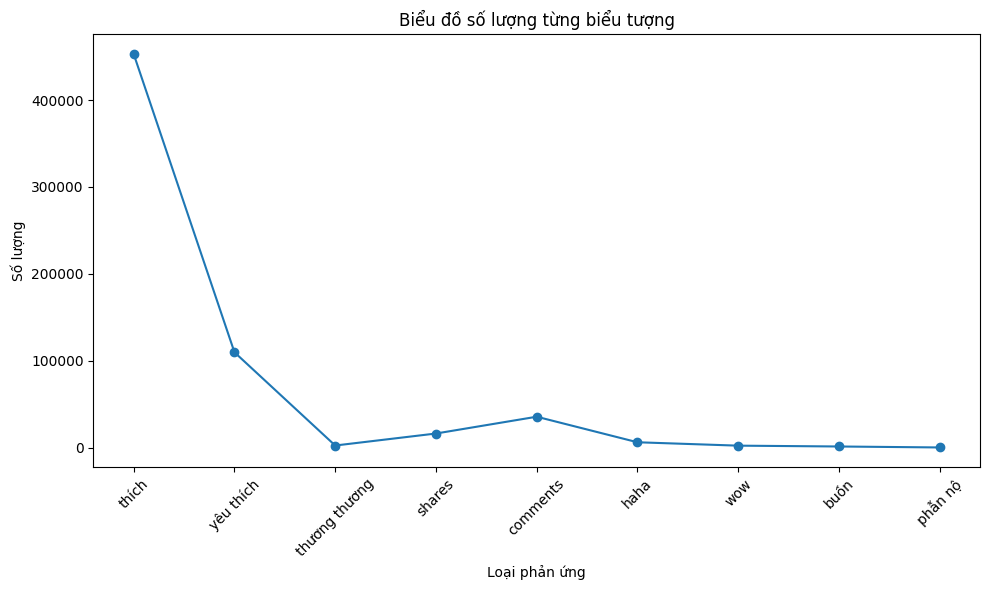

In [73]:
import matplotlib.pyplot as plt

# Dữ liệu số lượng từng biểu tượng đã có trong reaction_counts
reactions_counts_key = reaction_counts.keys()
counts = reaction_counts.values()

plt.figure(figsize=(10, 6))  
plt.plot(reactions_counts_key, counts, marker='o', linestyle='-') 
plt.xlabel('Loại phản ứng')  
plt.ylabel('Số lượng')  
plt.title('Biểu đồ số lượng từng biểu tượng')  

# Hiển thị biểu đồ
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()



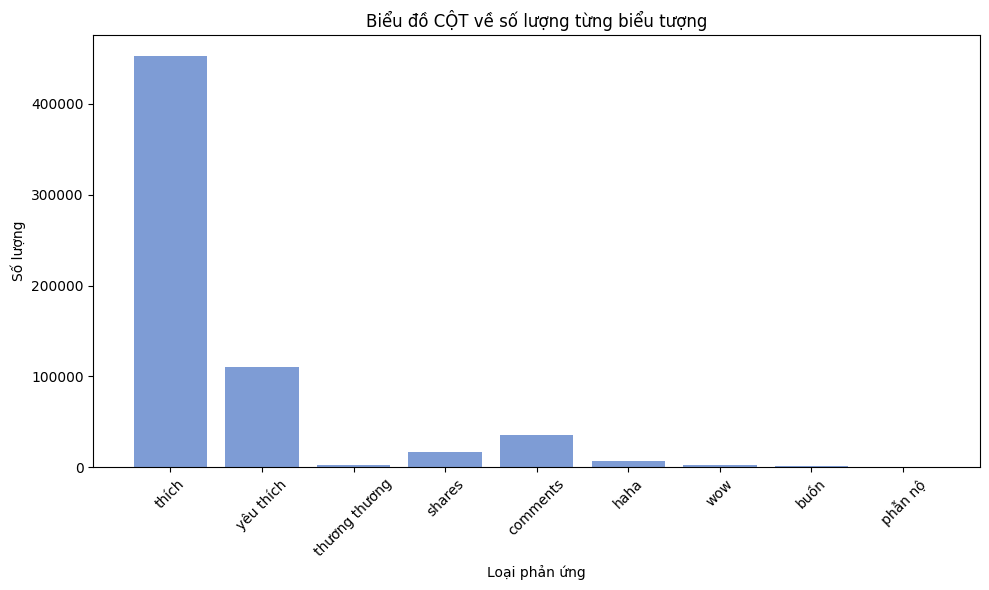

In [74]:
import matplotlib.pyplot as plt

def plot_reaction_counts(reaction_counts):
    reactions_counts_key = reaction_counts.keys()
    counts = reaction_counts.values()

    
    plt.figure(figsize=(10, 6))
    plt.bar(reactions_counts_key, counts, color='#7e9cd5')
    plt.xlabel('Loại phản ứng')
    plt.ylabel('Số lượng')
    plt.title('Biểu đồ CỘT về số lượng từng biểu tượng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Sử dụng hàm để vẽ biểu đồ
plot_reaction_counts(reaction_counts)


### REACTIONS ICON

In [75]:
reaction_icons = {
    'thích': '👍',
    'yêu thích': '❤️',
    'shares': '🔁',
    'comments': '💬',
    'thương thương': '🥺',
    'haha': '😄',
    'wow': '😮',
    'buồn': '😢',
    'phẫn nộ': '😡'
}

for reaction, count in reaction_counts.items():
    print(f"{reaction} {reaction_icons.get(reaction, '')}: {count} ")

thích 👍: 452859 
yêu thích ❤️: 109764 
thương thương 🥺: 2476 
shares 🔁: 16288 
comments 💬: 35612 
haha 😄: 6223 
wow 😮: 2320 
buồn 😢: 1362 
phẫn nộ 😡: 248 


### TẠO BIỂU ĐỒ VỀ SỐ LƯỢNG CỦA REACTIONS DẠNG CỘT

In [76]:
reaction_icons_image= {
    'thích': Image.open('../Images/like.png'),
    'yêu thích': Image.open('../Images/love.png'),
    'haha': Image.open('../Images/haha.png'),
    'wow': Image.open('../Images/wow.png'),
    'buồn': Image.open('../Images/sad.png'),
    "phẫn nộ": Image.open('../Images/angry.png'),
    'thương thương': Image.open('../Images/care.png'),
    'shares': Image.open('../Images/share.png'),
    'comments': Image.open('../Images/comment.png')
}

### BIỂU ĐỒ CỘT VỀ REACTIONS ICON 

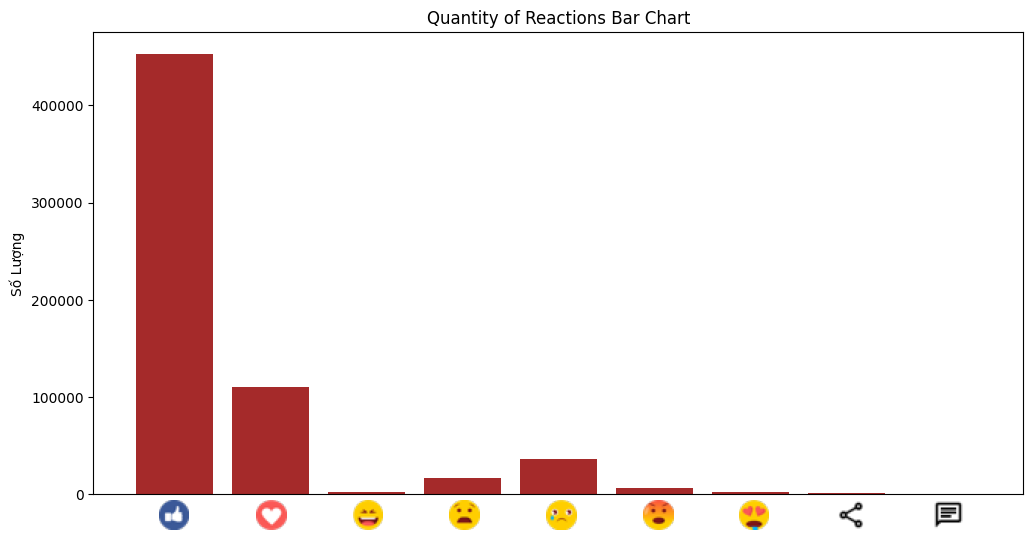

In [77]:
import matplotlib.pyplot as plt
from PIL import Image


icon_size = (20, 20)  # Điều chỉnh kích thước emoji tại đây
for reaction in reaction_icons_image:
    reaction_icons_image[reaction] = reaction_icons_image[reaction].resize(icon_size)


fig, ax = plt.subplots(figsize=(12, 6))  # Điều chỉnh kích thước biểu đồ tại đây
bars = ax.bar(range(len(reaction_counts)), list(reaction_counts.values()), color='brown')

ax.set_xticks([])

for idx, (reaction, icon) in enumerate(reaction_icons_image.items()):
    icon_ax = fig.add_axes([0.1675+ 0.725*idx/9, 0.05, 0.05, 0.05], zorder=1)  
    icon_ax.imshow(icon)
    icon_ax.axis('off')  

ax.set_title('Quantity of Reactions Bar Chart')
ax.set_ylabel('Số Lượng')

plt.show()

In [78]:
reactions_dict

0      {'thích': 369, 'yêu thích': 68, 'thương thương...
1      {'thích': 164, 'yêu thích': 28, 'thương thương...
2      {'thích': 58, 'yêu thích': 3, 'thương thương':...
3      {'thích': 502, 'yêu thích': 62, 'haha': 1, 'wo...
4      {'thích': 109, 'yêu thích': 7, 'shares': 2, 'c...
                             ...                        
172    {'thích': 466, 'yêu thích': 80, 'wow': 4, 'thư...
173    {'thích': 2533, 'yêu thích': 391, 'haha': 83, ...
174    {'thích': 1090, 'yêu thích': 206, 'haha': 1, '...
175    {'thích': 15205, 'yêu thích': 4547, 'haha': 14...
176    {'thích': 922, 'yêu thích': 107, 'haha': 2, 't...
Name: reactions, Length: 177, dtype: object

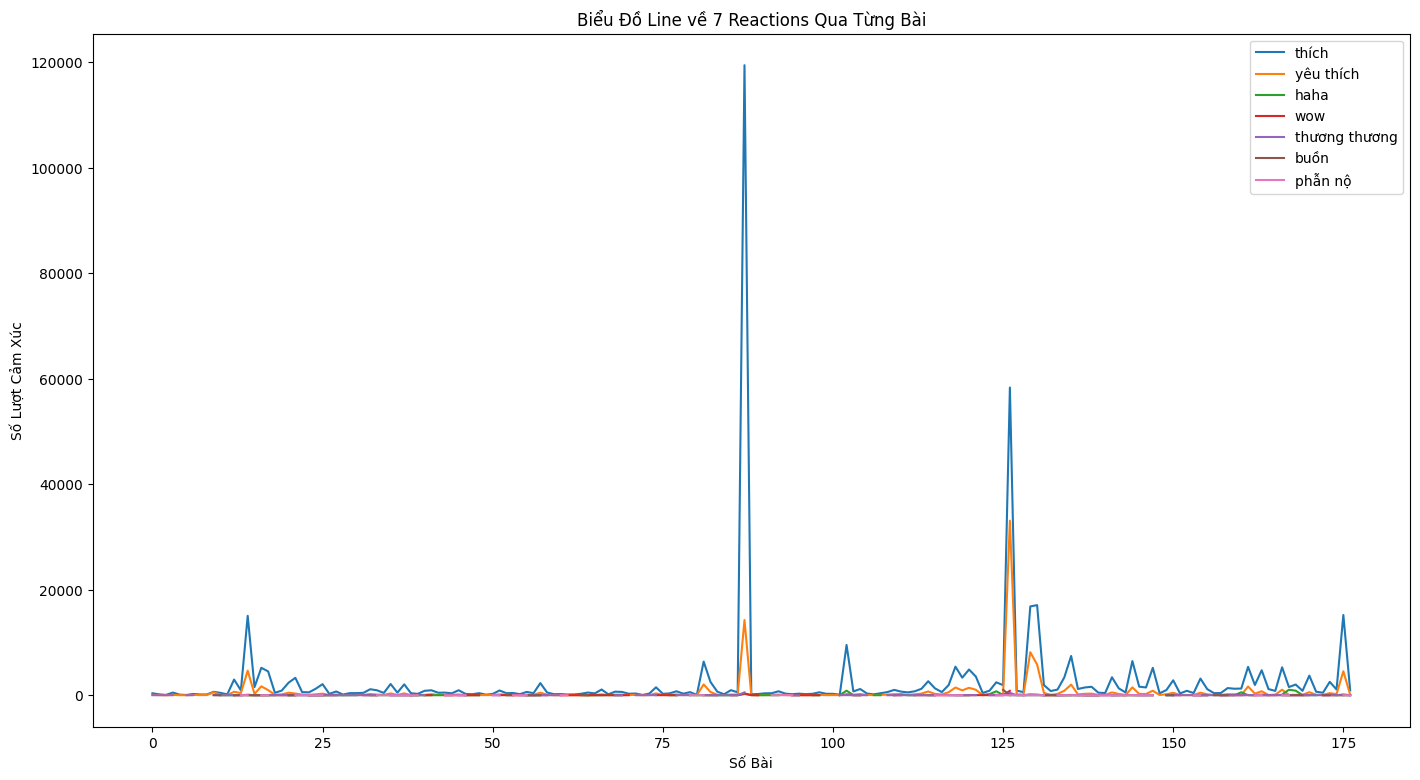

In [79]:
data_frame = pd.DataFrame(reaction_data_list)

unique_reactions_list_so_sanh = ['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ']

# Đảm bảo tất cả các loại reactions có mặt trong DataFrame
for reaction in unique_reactions_list_so_sanh:
    if reaction not in data_frame.columns:
        data_frame[reaction] = 0

while len(data_frame) < 176:
    data_frame = data_frame.append({reaction: 0 for reaction in unique_reactions_list_so_sanh}, ignore_index=True)

plt.figure(figsize=(17, 9))
for reaction in unique_reactions_list_so_sanh:
    plt.plot(data_frame.index, data_frame[reaction], label=reaction, marker='')

plt.xlabel('Số Bài')
plt.ylabel('Số Lượt Cảm Xúc')
plt.title('Biểu Đồ Line về 7 Reactions Qua Từng Bài')
plt.legend()
plt.show()


### BIỂU ĐỒ VỀ SỰ THAY ĐỔI TỔNG LƯỢT TƯƠNG TÁC CỦA BÀI ĐĂNG 

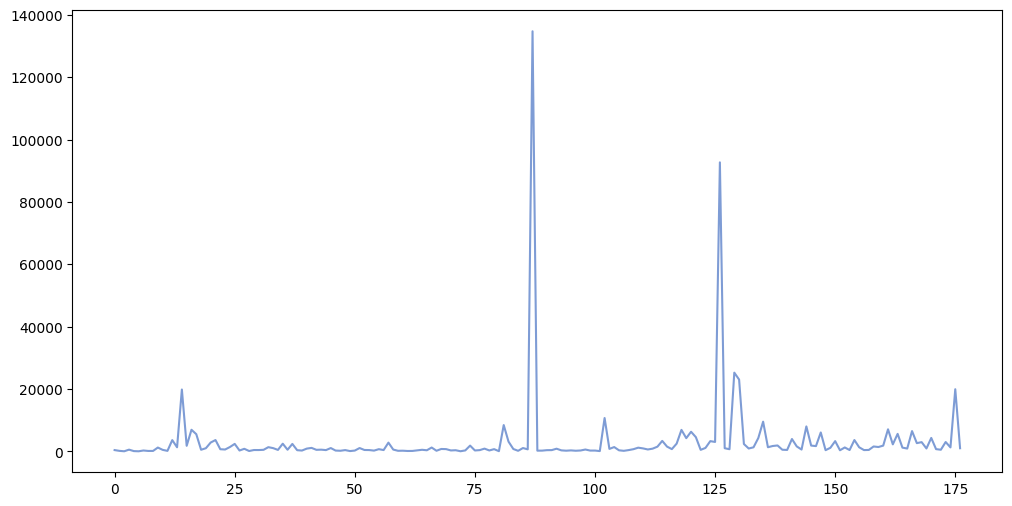

In [80]:
plt.subplots(figsize=(12, 6))
plt.plot(df['reaction_count'], color = '#7e9cd5')

plt.show()

In [81]:
top5_posts = df.nlargest(5, 'reaction_count')
print(top5_posts[['post_id', 'reaction_count']])


              post_id  reaction_count
87    666274178867153          134749
126  5805048782841490           92713
129  5792459867433715           25272
130  5791770300836005           23057
175  5650204744992562           19958


In [82]:
df['post_text'][87]

'You know your sauce is good when Gordon Ramsay wants to steal it for himself. 😂'